# 確率分布の作図

- 執筆期間：2022/01/11 - 2022/01/13

In [1]:
# 更新日時を出力
import datetime
now = datetime.datetime.now()
print('更新日時：' + '{0:%Y-%m-%d %H:%M}'.format(now))

更新日時：2022-01-14 03:50


<br>

# 二項分布

　二項分布(Binomial Distribution)の計算と作図を行います。  
<br>

　利用するライブラリを読み込みます。

In [2]:
# 利用するライブラリ
import numpy as np
from scipy.stats import binom, multinomial # 二項分布, 多項分布
from scipy.special import gamma, loggamma # ガンマ関数, 対数ガンマ関数
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

　分布の変化をアニメーション(gif画像)で確認するのに`matplotlib`ライブラリの`animation`モジュールを利用します。  
<br>

## 定義式の確認

　表(当たり)の出る確率が$\phi$であるコイン(くじ)を$M$回試行するとき、表(当たり)の出る回数$x$の確率分布を二項分布と言います。  
　$x$は、コインを$M$回投げて表が出た回数なので、全て裏のときの0から全て表のときの$M$の整数になります。$x$が0から$M$の値をとることを$x = \{0, 1, \cdots, M\}$で表します。  
　ベルヌーイ分布と同様に、成功確率(表・当たりとなる確率)を$0 \leq \phi \leq 1$、失敗確率(裏・外れとなる確率)を$1 - \phi$とします。  

　二項分布は、パラメータ$\phi$を用いて次の式で定義されます。

$$
\mathrm{Bin}(x | M, \phi)
    = \frac{M!}{(M - x)! x!} \phi^x (1 - \phi)^{M-x}
$$

　ここで、正規化項

$$
{}_M\mathrm{C}_x
    = \frac{M!}{(M - x)! x!}
$$

は、試行回数が$M$回のとき表が$x$回となる組合せの数に対応します。  

　例えば、コインを3回投げて($M = 3$で)表が2回出る($x = 2$となる)とき、二項分布の式は

$$
\begin{aligned}
\mathrm{Bin}(x = 2 | M = 3, \phi)
   &= \frac{3!}{(3 - 2)! 2!}
      \phi^2
      (1 - \phi)^{3-2} \\
   &= 3 \phi^2 (1 - \phi)
\end{aligned}
$$

表が2回出る確率$\phi^2$と裏が1回出る確率$1 - \phi$と正規化項の積となります。このとき正規化項は、3回中2回表となる組み合わせを表し、「表・表・裏」「表・裏・表」「裏・表・表」の3通りであることを求めています。  
　このように、$x$の値に対応した確率となるように式が定義されています。  
<br>

　また試行回数が1回($M = 1$)のとき、二項分布は

$$
\begin{aligned}
\mathrm{Bin}(x | 1, \phi)
   &= \frac{1!}{(1 - x)! x!}
      \phi^x
      (1 - \phi)^{1-x} \\
   &= \frac{1!}{1! 0!}
      \phi^x
      (1 - \phi)^{1-x} \\
   &= \phi^x
      (1 - \phi)^{1-x}
          = \mathrm{Bern}(x | \phi)
\end{aligned}
$$

ベルヌーイ分布と等しくなります。階乗の定義より$0! = 1$なので、$x$が0か1のどちらであっても正規化項は1になります。  
　ベルヌーイ分布は、コインを1回投げて表が1回出ることを$x = 1$、表が1回も出ない(裏が出る)ことを$x = 0$で表していると言えます。  

　二項分布の対数をとると

$$
\begin{aligned}
\log \mathrm{Bin}(x | N, \phi)
   &= \log N! - \log (N - x)! - \log x! \\
   &\quad
      + x \log \phi + (N - x) \log (1 - \phi)
\end{aligned}
$$

となります。対数の性質より$\log x^a = a \log x$です。  

　二項分布の平均と分散は、次の式で計算できます。詳しくは「統計量の導出」を参照してください。

$$
\begin{aligned}
\mathbb{E}[x]
   &= M \phi
\\
\mathbb{V}[x]
   &= M \phi (1 - \phi)
\end{aligned}
$$

<br>

　これらの計算を行いグラフを作成します。  
<br>

## 確率の計算

　二項分布に従う確率を計算する方法をいくつか確認します。  
<br>

　パラメータを設定します。

In [3]:
# パラメータを指定
phi = 0.3

# 試行回数を指定
M = 10

# 確率変数の値を指定:(x <= M)
x = 3

　二項分布のパラメータ$0 \leq \phi \leq 1$、試行回数$M$、確率変数がとり得る値$x \in \{0, 1, \cdots, M\}$を指定します。設定した値に従う確率を計算します。  

　まずは、定義式から確率を計算します。

In [4]:
# 定義式により確率を計算
C = gamma(M + 1) / gamma(M - x + 1) / gamma(x + 1)
prob = C * phi**x * (1 - phi)**(M - x)
print(prob)

0.2668279319999998


　二項分布の定義式

$$
\begin{aligned}
C_{\mathrm{Bin}}
   &= \frac{M!}{(M - x)! x!}
\\
p(x | \phi)
   &= C_{\mathrm{Bin}} \phi^x (1 - \phi)^{M-x}
\end{aligned}
$$

で計算します。$C_{\mathrm{Bin}}$は、二項分布の正規化係数です。  
　階乗$x!$の計算は、ガンマ関数$\Gamma(x + 1) = x!$に置き換えて計算します。ガンマ関数は、`SciPy`ライブラリの`special`モジュールの`gamma()`で計算できます。  

　対数をとった定義式から計算します。

In [5]:
# 対数をとった定義式により確率を計算
log_C = loggamma(M + 1) - loggamma(M - x + 1) - loggamma(x + 1)
log_prob = log_C + x * np.log(phi) + (M - x) * np.log(1 - phi)
pron = np.exp(log_prob)
print(prob, log_prob)

0.2668279319999998 -1.321151277766889


　対数をとった定義式

$$
\begin{aligned}
\log C_{\mathrm{Bin}}
   &= \log M! - \log (M - x)! - \log x!
\\
\log p(x | \phi)
   &= \log C_{\mathrm{Bin}}
      + x \log \phi
      + (N - x) \log (1 - \phi)
\end{aligned}
$$

を計算します。  
　対数をとったガンマ関数は`loggamma()`で計算できます。  
　計算結果の指数をとると確率が得られます。

$$
p(x | \phi)
    = \exp \Bigr(
          \log p(x | \phi)
      \Bigr)
$$

　指数と対数の性質より$\exp(\log x) = x$です。  

　次は、`SciPy`ライブラリのモジュールを使って確率を計算します。  
　二項分布のモジュール`binom`の確率計算メソッド`pmf()`を使って計算します。

In [6]:
# 二項分布の関数により確率を計算
prob = binom.pmf(k=x, n=M, p=phi)
print(prob)

0.26682793200000016


　成功回数の引数`k`に`x`、試行回数の引数`n`に`M`、成功確率の引数`p`に`phi`を指定します。  

　`logpmf()`だと対数をとった確率を計算します。

In [7]:
# 二項分布の対数をとった関数により確率を計算
log_prob = binom.logpmf(k=x, n=M, p=phi)
prob = np.exp(log_prob)
print(prob, log_prob)

0.26682793200000016 -1.3211512777668881


　計算結果の指数をとると確率が得られます。  

　以降の計算は、変数とパラメータをベクトル形式にしておく必要があります。

In [8]:
# ベクトルに変換
x_v = np.array([M - x, x])
phi_v = np.array([1.0 - phi, phi])

　失敗確率(クラス0の出現確率)$1 - \phi$と成功確率(クラス1の出現確率)$\phi$を持つ配列を作成して`phi_v`とします。  
　失敗回数(クラス0の出現頻度)$M - x$と成功回数(クラス1の出現頻度)$x$を持つ配列を作成して`x_v`とします。  

　多項分布のモジュール`multinomial`の確率計算メソッド`pmf()`を使って計算します。

In [9]:
# 多項分布の関数により確率を計算
prob = multinomial.pmf(x=x_v, n=M, p=phi_v)
print(prob)

0.2668279319999999


　出現頻度の引数`x`に`x_v`、試行回数の引数`n`に`M`、出現確率の引数`p`に`phi_v`を指定します。  

　`logpmf()`だと対数をとった確率を計算します。

In [10]:
# 多項分布の対数をとった関数により確率を計算
log_prob = multinomial.logpmf(x=x_v, n=M, p=phi_v)
prob = np.exp(log_prob)
print(prob, log_prob)

0.2668279319999999 -1.321151277766889


　計算結果の指数をとると確率が得られます。  
<br>

## 統計量の計算

　二項分布の平均と分散を計算します。  
<br>

　平均を計算します。

In [11]:
# 平均を計算
E_x = M * phi
print(E_x)

3.0


　二項分布の平均は、次の式で計算できます。

$$
\mathbb{E}[x]
    = M \phi
$$

　二項分布のモジュールの平均メソッド`mean()`でも計算できます。

In [12]:
# ベルヌーイ分布の関数により平均を計算
print(binom.mean(n=M, p=phi))

3.0


　確率計算と同様に引数を指定します。  

　分散を計算します。

In [13]:
# 分散を計算
V_x = M * phi * (1.0 - phi)
print(V_x)

2.0999999999999996


　二項分布の分散は、次の式で計算できます。

$$
\mathbb{V}[x]
    = M \phi (1 - \phi)
$$

　`var()`メソッドで分散を計算できます。

In [14]:
# ベルヌーイ分布の関数により分散を計算
print(binom.var(n=M, p=phi))

2.0999999999999996


　こちらも同様に引数を指定します。  
<br>

## グラフの作成

　`Matplotlib`ライブラリの`PyPlot`モジュールを利用してベルヌーイ分布のグラフを作成します。  
<br>

　二項分布の確率変数$x$がとり得る値ごとの確率を計算します。

In [15]:
# 作図用のxの値を作成
x_vals = np.arange(M + 1)

# 分布を計算
probability = binom.pmf(k=x_vals, n=M, p=phi)
print(probability[:5])

[0.02824752 0.12106082 0.23347444 0.26682793 0.20012095]


　$x$がとり得る値`0`から`M`を作成して`x_vals`とします。  
　`x_vals`の各値となる確率を計算します。  

　二項分布のグラフを作成します。

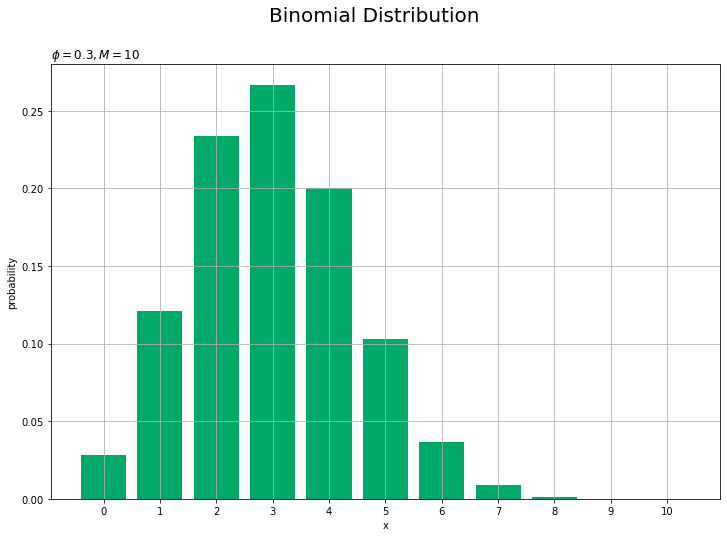

In [16]:
# 二項分布を作図
plt.figure(figsize=(12, 8)) # 図の設定
plt.bar(x=x_vals, height=probability, color='#00A968') # 棒グラフ
#plt.vlines(x=E_x, ymin=0.0, ymax=np.max(probability), color='orange', linestyle='--', label='$E[x]$') # 平均
#plt.vlines(x=E_x - V_x, ymin=0.0, ymax=np.max(probability), color='orange', linestyle=':', label='$E[x] - \sqrt{V[x]}$') # 平均 - 標準偏差
#plt.vlines(x=E_x + V_x, ymin=0.0, ymax=np.max(probability), color='orange', linestyle=':', label='$E[x] + \sqrt{V[x]}$') # 平均 + 標準偏差
plt.xlabel('x') # x軸ラベル
plt.ylabel('probability') # y軸ラベル
plt.suptitle('Binomial Distribution', fontsize=20) # 図タイトル
plt.title('$\phi=' + str(phi) + ', M=' + str(M) + '$', loc='left') # タイトル
plt.xticks(ticks=x_vals) # x軸目盛
#plt.legend() # 凡例
plt.grid() # グリッド線
plt.show() # 描画

　二項分布のグラフを描画できました。  
<br>

## パラメータとグラフの形状の関係

　続いて、パラメータ$\phi$の値を少しずつ変更して、分布の変化をアニメーションで確認します。

MovieWriter ffmpeg unavailable; using Pillow instead.


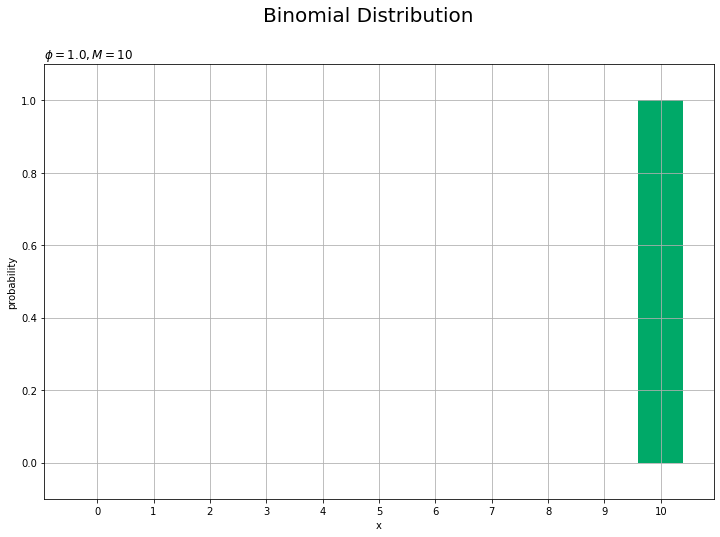

In [17]:
# 作図用のphiの値を作成
phi_vals = np.arange(start=0.0, stop=1.01, step=0.01)

# 図を初期化
fig = plt.figure(figsize=(12, 8))

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i回目の値を取得
    phi = phi_vals[i]
    
    # 分布を計算
    probability = binom.pmf(k=x_vals, n=M, p=phi)
    
    # 二項分布を作図
    plt.bar(x=x_vals, height=probability, color='#00A968') # 棒グラフ
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('probability') # y軸ラベル
    plt.suptitle('Binomial Distribution', fontsize=20) # 図タイトル
    plt.title('$\phi=' + str(np.round(phi, 2)) + ', M=' + str(M) + '$', loc='left') # タイトル
    plt.xticks(ticks=x_vals) # x軸目盛
    plt.grid() # グリッド線
    plt.ylim(-0.1, 1.1) # y軸の表示範囲

# gif画像を作成
anime_prob = FuncAnimation(fig, update, frames=len(phi_vals), interval=100)

# gif画像を保存
anime_prob.save('../figure/Python/Binomial_prob_phi.gif')

　$\phi$がとり得る値を作成して`phi_vals`とします。  
　`phi_vals`の値ごとに分布を計算して作図します。

　パラメータ$\phi$の値が大きくなるのに従って、成功回数$x$が大きいほど確率が高くなる(山が右に移動する)のを確認できます。  

　続いて、$\phi$を固定して$M$を変更してみます。

MovieWriter ffmpeg unavailable; using Pillow instead.


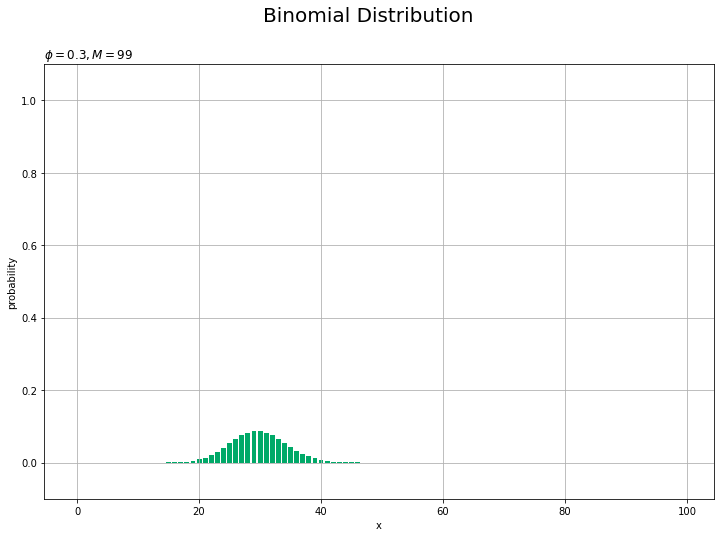

In [18]:
# パラメータを指定
phi = 0.3

# 試行回数の最大値を指定
M_max = 100

# 図を初期化
fig = plt.figure(figsize=(12, 8))

# 作図処理を関数として定義
def update(M):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # 作図用のxの値を作成
    x_vals = np.arange(M + 1)
    
    # 分布を計算
    probability = binom.pmf(k=x_vals, n=M, p=phi)
    
    # 二項分布を作図
    plt.bar(x=x_vals, height=probability, color='#00A968') # 棒グラフ
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('probability') # y軸ラベル
    plt.suptitle('Binomial Distribution', fontsize=20) # 図タイトル
    plt.title('$\phi=' + str(np.round(phi, 2)) + ', M=' + str(M) + '$', loc='left') # タイトル
    #plt.xticks(ticks=x_vals) # x軸目盛
    plt.grid() # グリッド線
    plt.ylim(-0.1, 1.1) # y軸の表示範囲

# gif画像を作成
anime_prob = FuncAnimation(fig, update, frames=M_max, interval=100)

# gif画像を保存
anime_prob.save('../figure/Python/Binomial_prob_M.gif')

　試行回数$M$の最大値(フレーム数)を`M_max`に指定します。  
　`0`から`M_max - 1`まで順番に`M`の値が更新され、`x_vals`の要素も更新されます。  
　更新された`x_vals`に対して分布を計算して作図します。  

　$M$が増えるのに従って、成功回数$x$が大きいほど確率が高くなる(山が右に移動する)のを確認できます。ただし、$x$がとり得る値の範囲`x_vals`も広がっていくため、`x_vals`全体における山の位置は変わりません。  
<br>

## 乱数の生成

　二項分布の乱数を生成してヒストグラムを確認します。  
<br>

　パラメータを指定して、二項分布に従う乱数を生成します。

In [19]:
# パラメータを指定
phi = 0.3

# 試行回数を指定
M = 10

# データ数を指定
N = 1000

# 二項分布に従う乱数を生成
x_n = np.random.binomial(n=M, p=phi, size=N)

# 確認
print(x_n[:5])

[1 6 2 1 1]


　二項分布の乱数生成関数`np.random.binomial()`の試行回数の引数`n `に`M`、成功確率の引数`p`に`phi`、データ数(サンプルサイズ)の引数`size`に`N`を指定します。  

　サンプルの値を集計します。

In [20]:
# 乱数を集計
frequency = np.array([np.sum(x_n == m) for m in range(M + 1)])
print(frequency[:5])

[ 30 113 248 277 179]


　`x_n`に含まれる値が`m`の要素数は、`np.sum(x_n == m)`で得られます。  
　リスト内包表記で、`0`から`M`までカウントして配列に格納します。  

　ヒストグラムを作成します。

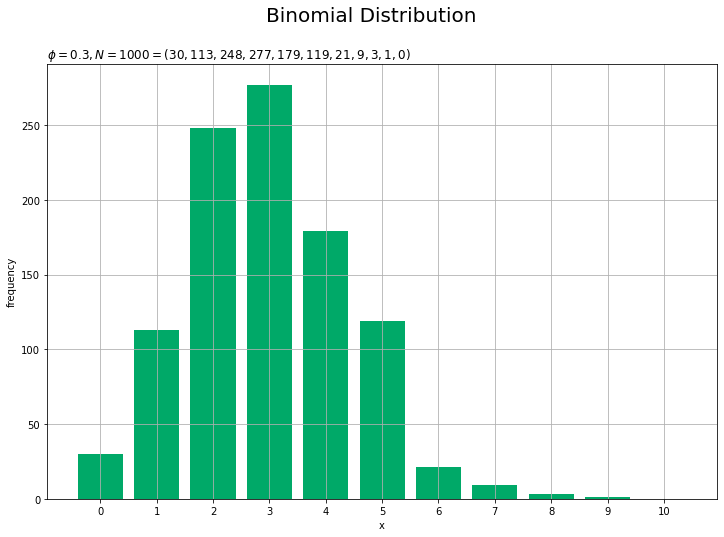

In [21]:
# サンプルのヒストグラムを作成
plt.figure(figsize=(12, 8)) # 図の設定
plt.bar(x=x_vals, height=frequency, color='#00A968') # ヒストグラム
plt.xlabel('x') # x軸ラベル
plt.ylabel('frequency') # y軸ラベル
plt.suptitle('Binomial Distribution', fontsize=20) # 図タイトル
plt.title('$\phi=' + str(phi) + ', N=' + str(N) + 
          '=(' + ', '.join([str(f) for f in frequency]) + ')$', loc='left') # タイトル
plt.xticks(ticks=x_vals) # x軸目盛
plt.grid() # グリッド線
plt.show() # 描画

<br>

　構成比を分布と重ねて描画します。

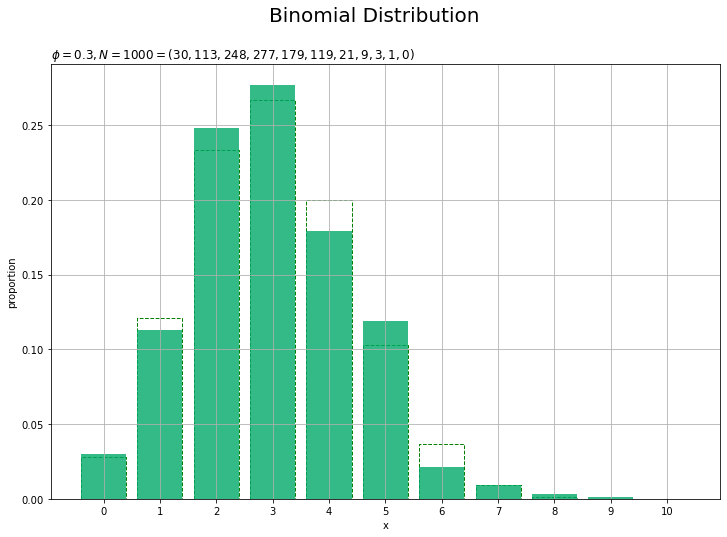

In [22]:
# サンプルの構成比を作図
plt.figure(figsize=(12, 8)) # 図の設定
plt.bar(x=x_vals, height=probability, color='white', edgecolor='green', linestyle='--') # 分布
plt.bar(x=x_vals, height=frequency / N, color='#00A968', alpha=0.8) # 構成比
plt.xlabel('x') # x軸ラベル
plt.ylabel('proportion') # y軸ラベル
plt.suptitle('Binomial Distribution', fontsize=20) # 図タイトル
plt.title('$\phi=' + str(phi) + ', N=' + str(N) + 
          '=(' + ', '.join([str(f) for f in frequency]) + ')$', loc='left') # タイトル
plt.xticks(ticks=x_vals) # x軸目盛
plt.grid() # グリッド線
plt.show() # 描画

　頻度`frequency`をデータ数`N`で割り、各値の構成比を計算します。  

　データ数が十分に増えると分布のグラフに形が近づきます。  
<br>

　サンプルサイズとヒストグラムの変化をアニメーションで確認します。乱数を1つずつ取り出して作図します。  

　ヒストグラムのアニメーションを作成します。

MovieWriter ffmpeg unavailable; using Pillow instead.


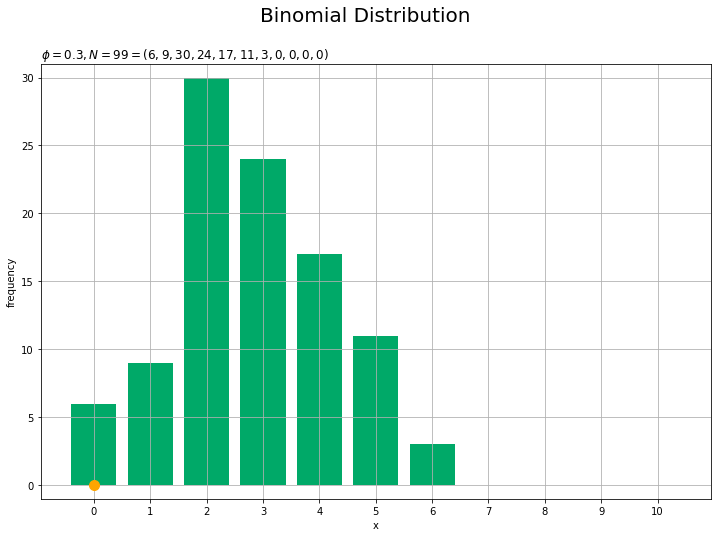

In [23]:
# フレーム数を指定
N = 100

# 図を初期化
fig = plt.figure(figsize=(12, 8))

# 頻度の最大値を取得
y_max = np.max([np.sum(x_n[:N] == m) for m in range(M + 1)])

# 作図処理を関数として定義
def update(n):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # n個の乱数を集計
    frequency = np.array([np.sum(x_n[:(n+1)] == m) for m in range(M + 1)])
    
    # サンプルのヒストグラムを作成
    plt.bar(x=x_vals, height=frequency, color='#00A968', zorder=1) # ヒストグラム
    plt.scatter(x=x_n[n], y=0.0, color='orange', s=100, zorder=2) # サンプル
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('frequency') # y軸ラベル
    plt.suptitle('Binomial Distribution', fontsize=20) # 図タイトル
    plt.title('$\phi=' + str(phi) + ', N=' + str(n) + 
              '=(' + ', '.join([str(f) for f in frequency]) + ')$', loc='left') # タイトル
    plt.xticks(ticks=x_vals) # x軸目盛
    plt.grid() # グリッド線
    plt.ylim(-1.0, y_max + 1.0) # y軸の表示範囲

# gif画像を作成
anime_freq = FuncAnimation(fig, update, frames=N, interval=100)

# gif画像を保存
anime_freq.save('../figure/Python/Binomial_freq.gif')

<br>

　構成比のアニメーションを作成します。

MovieWriter ffmpeg unavailable; using Pillow instead.


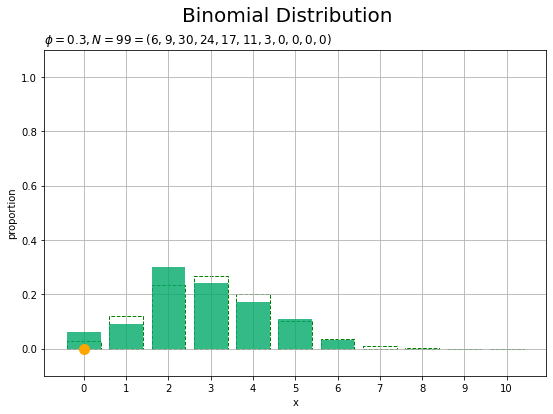

In [24]:
# 図を初期化
fig = plt.figure(figsize=(9, 6))

# 作図処理を関数として定義
def update(n):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # n個の乱数を集計
    frequency = np.array([np.sum(x_n[:(n+1)] == m) for m in range(M + 1)])
    
    # サンプルの構成比を作成
    plt.bar(x=x_vals, height=probability, color='white', edgecolor='green', linestyle='--', zorder=1) # 分布
    plt.bar(x=x_vals, height=frequency / (n + 1), color='#00A968', alpha=0.8, zorder=2) # 構成比
    plt.scatter(x=x_n[n], y=0.0, color='orange', s=100, zorder=3) # サンプル
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('proportion') # y軸ラベル
    plt.suptitle('Binomial Distribution', fontsize=20) # 図タイトル
    plt.title('$\phi=' + str(phi) + ', N=' + str(n) + 
              '=(' + ', '.join([str(f) for f in frequency]) + ')$', loc='left') # タイトル
    plt.xticks(ticks=x_vals) # x軸目盛
    plt.grid() # グリッド線
    plt.ylim(-0.1, 1.1) # y軸の表示範囲

# gif画像を作成
anime_prop = FuncAnimation(fig, update, frames=N, interval=100)

# gif画像を保存
anime_prop.save('../figure/Python/Binomial_prop.gif')

　サンプルが増えるに従って、真の分布に近付いていくのを確認できます。  

　以上で、二項分布を確認できました。  
<br>